<a href="https://colab.research.google.com/github/rayssaz/DIO-Analise-de-Dados-com-Python-e-Pandas/blob/main/Planilhas_do_Excel_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manipulando Planilhas do Excel**

In [ ]:
# Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")

In [ ]:
# Concatenando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Exibindo as primeiras 5 linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Exibindo as últimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde
92,Natal,2019-01-02,4.57,1035,1
27,Natal,2018-07-16,390.00,853,3
89,Natal,2019-01-02,17.46,1034,1
46,Natal,2019-03-26,753.00,853,2
183,Salvador,2019-01-02,120.23,1037,2
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Alterando o tipo de dado da coluna Loja ID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade             object
Data               object
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# **Missing Values**


In [ ]:
# Verificando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
print(df.Vendas.isnull().sum())

0


In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
94,Aracaju,2018-01-01,198.24,1521,9
102,Natal,2019-01-02,40.84,1034,3
85,Natal,2019-01-02,16.88,1035,3
55,Fortaleza,2019-01-01,214.73,1002,4
65,Aracaju,2018-01-01,145.54,1522,3
21,Salvador,2019-01-01,39.72,1035,3
128,Natal,2019-01-02,36.84,1034,1
57,Salvador,2019-01-01,11.72,1035,1
36,Salvador,2019-01-01,9.67,1037,1
31,Recife,2019-01-01,176.23,981,7


## Criando novas colunas

In [ ]:
# Criando a coluna de receita, que consiste em vendas*quantidade

df["Receita"] = df["Vendas"].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Outro exemplo de criação de colunas. Encontrando a quantidade:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
# Verificando a maior receita
df["Receita"].max()

3544.0

In [ ]:
# Verificando a menor receita
df["Receita"].min()

3.34

**Como verificar a quais lojas pertencem o 
valor de menor e maior receita?**

Podemos fazer isso através dos métodos *nlargest* e *nsmallest*.



In [ ]:
#nlargest - retorna as linhas com os três maiores valores
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest - retorna as linhas com os três menores valores
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


**Verificando a soma da receita por cidade**

In [ ]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados
# ascending=False - retorna do maior p/ o menor
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


##Trabalhando com datas

In [ ]:
df.dtypes

Cidade             object
Data               object
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando a coluna data para um tipo datetime

df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

**Qual a receita por ano? Está aumentando ou diminuindo?**

In [ ]:
# Agrupamento por ano
# df["Data"].dt.year - extrai apenas o ano da data 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(8)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
129,Fortaleza,2019-03-02,35.34,982,7,247.38,7.0,2019
16,Natal,2018-07-01,298.00,854,3,894.00,3.0,2018
115,Aracaju,2018-01-01,50.99,1522,10,509.90,10.0,2018
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019
22,Natal,2018-06-21,621.00,853,3,1863.00,3.0,2018
116,Recife,2019-03-02,79.10,982,2,158.20,2.0,2019
137,Natal,2019-01-02,51.66,1036,3,154.98,3.0,2019
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019


In [ ]:
# Extraindo o mês e o dia
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
### Para remover linhas ou colunas faltantes

#df.drop(["Avery Bradley", "John Holland", "R.J. Hunter", "R.J. Hunter"], inplace=True)
#df.drop(["mes_venda","dia_venda"], axis=1, inplace=True)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda
165,Natal,2019-01-02,11.54,1037,1,11.54,1.0,2019,1,2
163,Salvador,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2
22,Natal,2018-06-21,621.00,853,3,1863.00,3.0,2018,6,21
87,Salvador,2019-01-01,135.19,1034,2,270.38,2.0,2019,1,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11


**Como verificar a data mais antiga?**

In [ ]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

**Como calcular a diferença de dias?**

In [ ]:
# Cálculo da diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019,3,2,425 days
195,Salvador,2019-01-02,44.89,1036,3,134.67,3.0,2019,1,2,366 days
155,Natal,2019-01-02,237.81,1036,3,713.43,3.0,2019,1,2,366 days
9,Salvador,2019-01-01,127.92,1036,1,127.92,1.0,2019,1,1,365 days
237,Natal,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days


In [ ]:
# Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias,trimestre_venda
101,Salvador,2019-01-01,32.28,1035,3,96.84,3.0,2019,1,1,365 days,1
3,Natal,2019-01-07,271.00,854,3,813.00,3.0,2019,1,7,371 days,1
178,Natal,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2,366 days,1
2,Salvador,2019-02-10,173.59,1035,3,520.77,3.0,2019,2,10,405 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1


**Como filtrar as vendas de 2019 do mês de Março?**

In [ ]:
# Filtrando as vendas
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias,trimestre_venda
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
113,Salvador,2019-03-02,18.90,1034,3,56.70,3.0,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,4.0,2019,3,27,450 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,4.0,2019,3,8,431 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1


### **Visualização de dados**

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

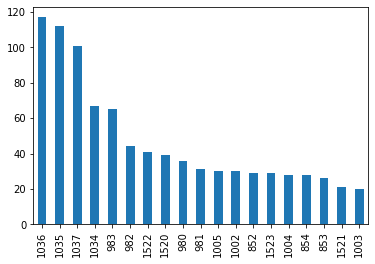

In [ ]:
# Gráfico de barras com a biblioteca Matplotlib
df['LojaID'].value_counts(ascending=False).plot.bar()

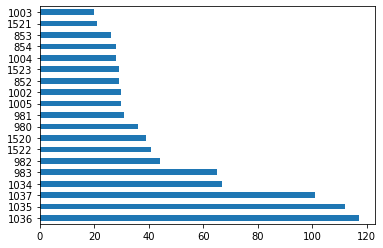

In [ ]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=False).plot.barh();

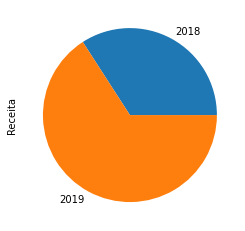

In [ ]:
# Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

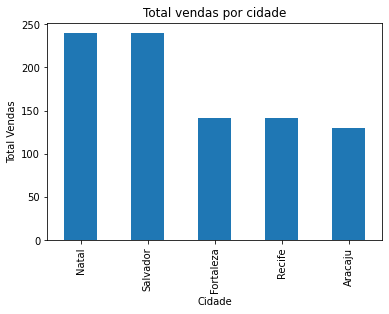

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

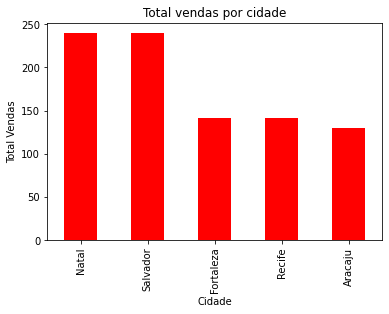

In [ ]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Alterando o estilo
plt.style.use("ggplot")

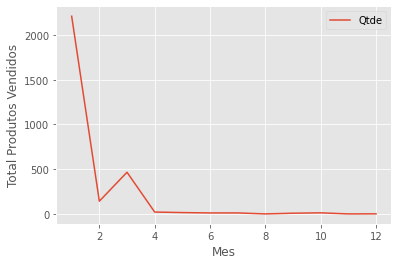

In [ ]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum()

Mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

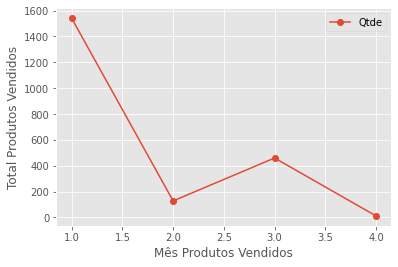

In [ ]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês Produtos Vendidos")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

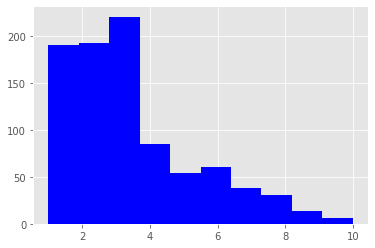

In [ ]:
# Histograma
plt.hist(df["Qtde"], color="blue");

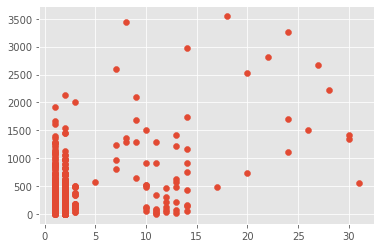

In [ ]:
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"]);

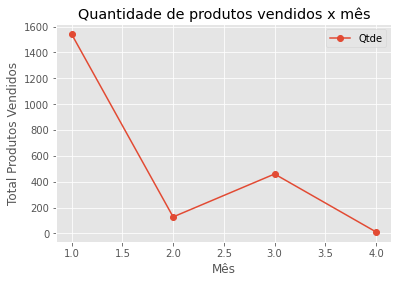

In [ ]:
# Salvando em PNG

df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Gráfico QTDE x MES.png");